# Import libraries and CSVs

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import folium

df_s = pd.read_csv('Desktop\s_cd.csv')
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
df_s.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
0,3.114750e+12,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.500000,90.000000,POINT (-120.50000000000001 90)
1,5.069700e+12,50697011,4134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,POINT (-122.42822330317601 37.7818959488603)
2,6.074730e+12,60747292,4104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672,37.799789,POINT (-122.41067242533701 37.799788690123)
3,7.103540e+12,71035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226,37.741362,POINT (-122.458226300605 37.7413616001449)
4,1.108240e+13,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459173,37.708200,POINT (-122.459172646607 37.7082001648459)


In [24]:
df_p = pd.read_csv('Desktop\p_cd.csv')
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
# df_p.head()
df_p.tail()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
217839,2609262,26,D,2006-06-24 22:40:00,2006-06-24,22:40:00,22,200626045975,300 BLOCK E THOMPSON ST,700,Motor Vehicle Theft,-75.131758,39.971436,39.971436,-75.131758
217840,2658567,25,L,2006-01-25 00:00:00,2006-01-25,00:00:00,20,200625009063,100 BLOCK W TIBER STREET,100,Homicide - Criminal,-75.127413,40.021395,40.021395,-75.127413
217841,2658967,12,N,2006-11-16 00:00:00,2006-11-16,00:00:00,16,200612048028,5200 BLOCK CHESTER AVENUE,100,Homicide - Criminal,-75.220391,39.941393,39.941393,-75.220391
217842,2658572,26,S,2006-01-05 00:00:00,2006-01-05,00:00:00,23,200626084894,2600 BLOCK N 9TH STREET,100,Homicide - Criminal,-75.146165,39.992339,39.992339,-75.146165
217843,2658574,12,M,2006-10-31 00:00:00,2006-10-31,00:00:00,20,200612040806,2700 BLOCK RUBY TERRACE,100,Homicide - Criminal,-75.214691,39.932559,39.932559,-75.214691


In [25]:
df_c = pd.read_csv('https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv')
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
df_c.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [26]:
df_s.dtypes

PdId             float64
IncidntNum         int64
Incident Code      int64
Category          object
Descript          object
DayOfWeek         object
Date              object
Time              object
PdDistrict        object
Resolution        object
Address           object
X                float64
Y                float64
location          object
dtype: object

In [27]:
df_p.dtypes

objectid                int64
dc_dist                 int64
psa                    object
dispatch_date_time     object
dispatch_date          object
dispatch_time          object
hour_                   int64
dc_key                  int64
location_block         object
ucr_general             int64
text_general_code      object
point_x               float64
point_y               float64
lat                   float64
lng                   float64
dtype: object

In [ ]:
#remove empty entries
df_s.dropna()
df_p.dropna()

# Crime stats

In [15]:
crime_count_c = pd.DataFrame(df_c.groupby('PRIMARY_TYPE').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count_c
#group by incident

,PRIMARY_TYPE,counts
0,THEFT,106
1,BATTERY,92
2,CRIMINAL DAMAGE,58
3,NARCOTICS,54
4,ASSAULT,32
5,OTHER OFFENSE,32
6,BURGLARY,30
7,MOTOR VEHICLE THEFT,24
8,ROBBERY,20
9,DECEPTIVE PRACTICE,20


In [16]:
crime_count = pd.DataFrame(df_s.groupby('Category').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count 

,Category,counts
0,LARCENY/THEFT,239208
1,OTHER OFFENSES,148164
2,NON-CRIMINAL,119984
3,ASSAULT,82509
4,VEHICLE THEFT,60719
5,VANDALISM,56087
6,DRUG/NARCOTIC,54096
7,WARRANTS,48872
8,BURGLARY,44861
9,SUSPICIOUS OCC,39016


In [17]:
crime_count = pd.DataFrame(df_p.groupby('text_general_code').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count 

,text_general_code,counts
0,All Other Offenses,48963
1,Other Assaults,26315
2,Vandalism/Criminal Mischief,23116
3,Thefts,20879
4,Theft from Vehicle,16978
5,Narcotic / Drug Law Violations,13373
6,Fraud,9128
7,Motor Vehicle Theft,8645
8,Burglary Residential,8486
9,Aggravated Assault No Firearm,6880


# visualisation

In [1]:
y = df_s['Category'].value_counts().head(10)
textprops = {"fontsize":25} 
plot.pie(y.values,labels= y.index,autopct='%0.1f%%',radius=1.5,textprops ={"fontsize":14})
plot.title('Top 10 crimes in San Francisco', fontsize = 15)
plot.show()

x = df_p['text_general_code'].value_counts().head(10)
textprops = {"fontsize":25} 
plot.pie(x.values,labels= x.index,autopct='%0.1f%%',radius=1.5,textprops ={"fontsize":14})
plot.title('Top 10 crimes in Philadelphia', fontsize = 15)
plot.show()

u = df_c['PRIMARY_TYPE'].value_counts().head(10)
textprops = {"fontsize":25} 
plot.pie(u.values,labels= u.index,autopct='%0.1f%%',radius=1.5,textprops ={"fontsize":14})
plot.title('Top 10 crimes in Chicago', fontsize = 15)
plot.show()

NameError: name 'df_s' is not defined

# MONTHLY ANALYSIS

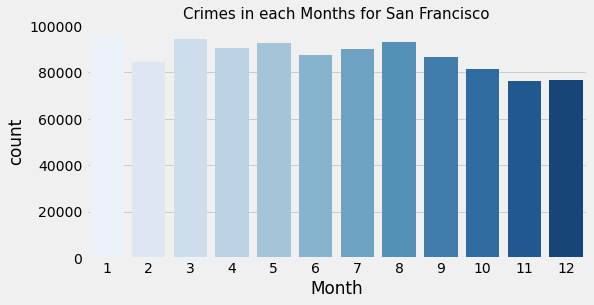

In [19]:
df_s['Date'] = pd.to_datetime(df_s['Date'])
df_s['Month'] = df_s['Date'].dt.month
plot.style.use('fivethirtyeight')
plot.rcParams['figure.figsize'] = (8,4)
sns.countplot(df_s['Month'], palette = 'Blues')
plot.title('Crimes in each Months for San Francisco', fontsize = 15)
plot.show()

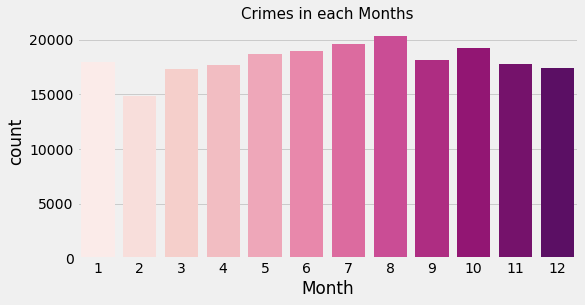

In [20]:
df_p['dispatch_date'] = pd.to_datetime(df_p['dispatch_date'])
df_p['Month'] = df_p['dispatch_date'].dt.month
plot.style.use('fivethirtyeight')
plot.rcParams['figure.figsize'] = (8,4)
sns.countplot(df_p['Month'], palette = 'RdPu')
plot.title('Crimes in each Months for Philadelphia', fontsize = 15)
plot.show()

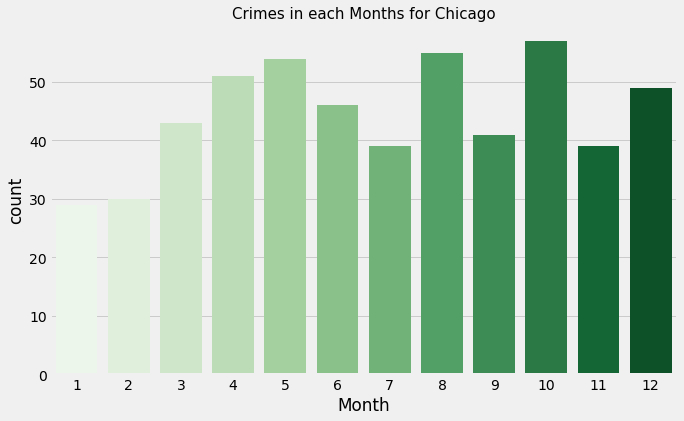

In [30]:
df_c['DATE'] = pd.to_datetime(df_c['DATE'])
df_c['Month'] = df_c['DATE'].dt.month
plot.style.use('fivethirtyeight')
plot.rcParams['figure.figsize'] = (8,4)
sns.countplot(df_c['Month'], palette = 'Greens')
plot.title('Crimes in each Months for Chicago', fontsize = 15)
plot.show()

# Day wise analysis

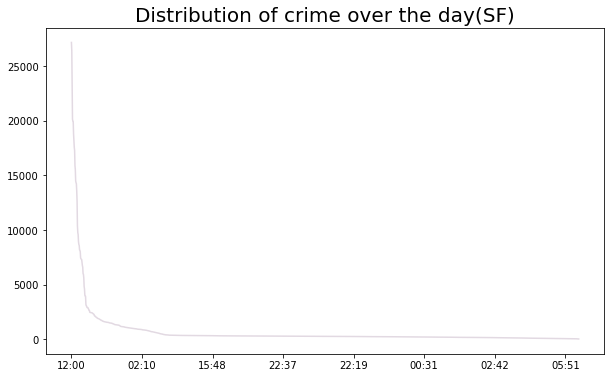

In [14]:
import warnings
warnings.filterwarnings('ignore')

color = plot.cm.twilight(np.linspace(0, 5, 100))
df_s['Time'].value_counts().plot.line(color = color, figsize = (10,6))

plot.title('Distribution of crime over the day(SF)', fontsize = 20)
plot.show()

In [13]:
# color = plot.cm.twilight(np.linspace(0, 5, 100))
# df_c['DATE'] = pd.to_datetime(df_c['DATE'])
# df_c['time'] = df_c['DATE'].dt.time
# df_c['time'].value_counts().plot.line(color = color, figsize = (10,6))

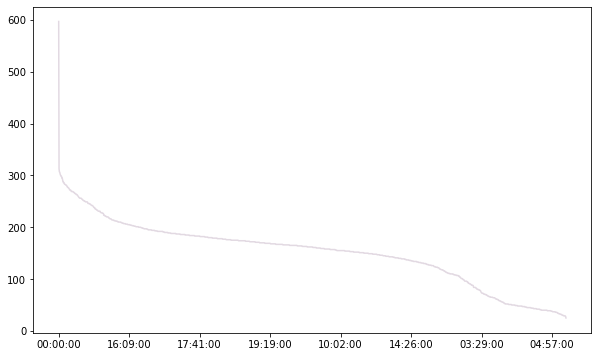

In [6]:
color = plot.cm.twilight(np.linspace(0, 5, 100))
df_p['dispatch_time'].value_counts().plot.line(color = color, figsize = (10,6))


In [22]:
# theft_2012 = pd.DataFrame(df_s[df_s['Category'].isin(['THEFT','OTHER OFFENCES', 'NON-CRIMINAL', 'DRUG/NARCOTIC', 'ASSAULT'])]['Category'])
# grouper = theft_2012.groupby(['Category'])
# data_2012 = grouper['Category'].count()
# data_2012.plot()
# plot.title("Top 5 monthly crimes in 2012")
# plot.show()

# Yearly analysis

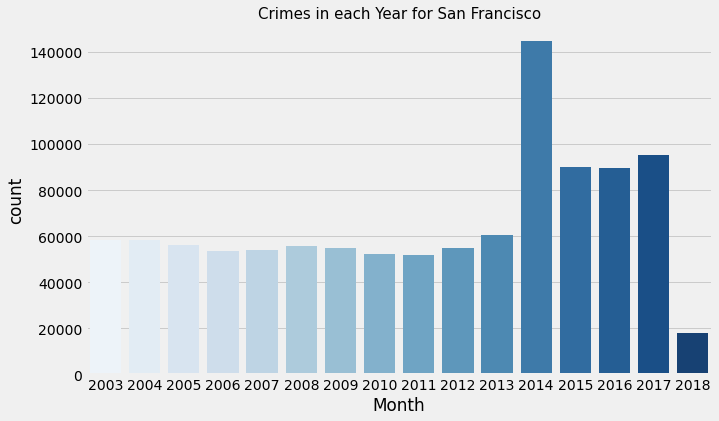

In [31]:
df_s['Date'] = pd.to_datetime(df_s['Date'])
df_s['Month'] = df_s['Date'].dt.year
plot.style.use('fivethirtyeight')
plot.rcParams['figure.figsize'] = (8,4)
sns.countplot(df_s['Month'], palette = 'Blues')
plot.title('Crimes in each Year for San Francisco', fontsize = 15)
plot.show()

In [5]:
# df_c['DATE'] = pd.to_datetime(df_c['DATE'])
# df_c['Month'] = df_c['DATE'].dt.year
# plot.style.use('fivethirtyeight')
# plot.rcParams['figure.figsize'] = (8,4)
# sns.countplot(df_p['Month'], palette = 'Greens')
# plot.title('Crimes in each year for Philadelphia', fontsize = 15)
# plot.show()